# COMP 433: Deep Learning, Lab 3

In this lab we will learn some basics of PyTorch. Save your answers for this lab as they will be used for part of Lab 3.



In [ ]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

## Loading Datasets in PyTorch

### Exercise 1

> Below, we create a _dataloader_ for the **MNIST** training data using the `torchvision` package (following e.g. https://github.com/pytorch/examples/blob/master/mnist/main.py#L112-L120).

> The dataloader iterates over the training set outputing mini-batches of size 256 image samples. Note you do not need to use the image labels in the rest of this lab.

> The `device` variable allows us to select which device to place the data on.

- Modify your colab (or local environment) to use a GPU and then set `device="cuda"` by rerunning the cell below such that the data is placed on GPU inside the for loop.


In [ ]:
dataset1 = datasets.MNIST('../data', train=True, download=True,
                          transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset1,
                                           batch_size=256,
                                           shuffle=True,
                                           drop_last=True)

device = 'cuda'

for (data, target) in train_loader:
    data = data.to(device)
    target = target.to(device)

print(data.shape)
print(target.shape)

torch.Size([256, 1, 28, 28])
torch.Size([256])


- Find 1 example per each digit (10 images) and plot them using `plt.imshow`.
    - All 256 images are **randomly** stacked over the `data` tensor; as indicated by the tensor's first dimension.
    - _Remember that the labels can be found in the `target` tensor`_
    - Use indexing (as you learned on previous labs) to select any particular image.
    - Once selected, use `torch.view` to make sure your slice has `[28,28]` shape.
    - `plt.imshow` will throw a `TypeError` if the passed object does not reside on CPU. Use the [`.cpu`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) function to bring your tensors back to CPU before plotting.
        - **HINT**: This should only require 1 line of code.
    - For clarity, you may want to specify a gray color map to `matplotlib` (i.e. pass `cmap='gray'` as argument to `plt.imshow`).

> NOTE: The [`.detach`](https://pytorch.org/docs/stable/generated/torch.Tensor.detach.html) function often preceeds `.cpu` as we might be in situation where we want to work with a particular part of one's computation graph. Thus, it's a good practice to create a copy of it apart, so that the original computation graph doesn't get affected.

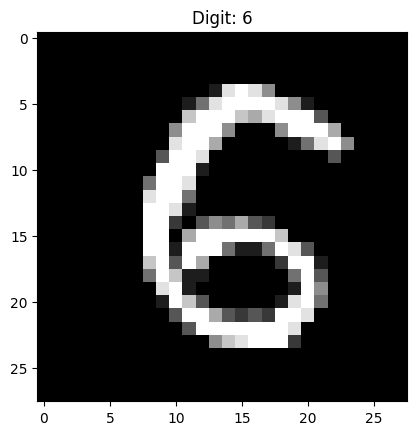

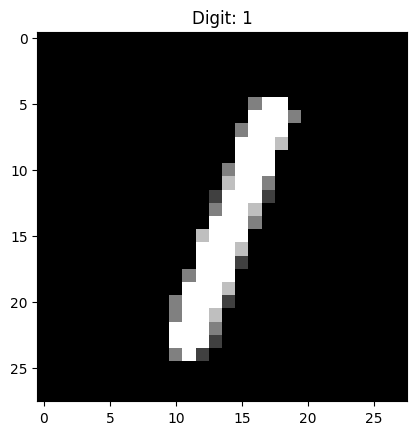

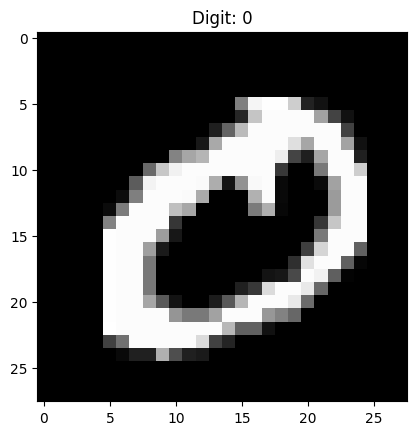

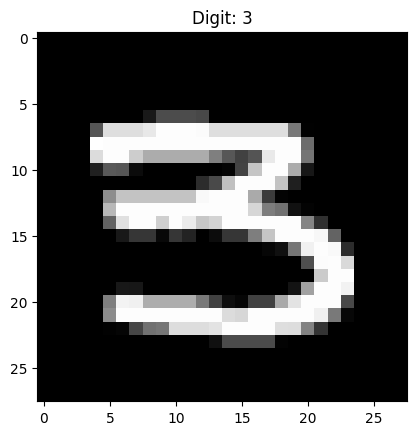

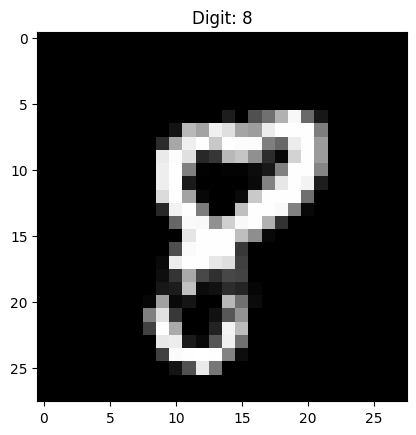

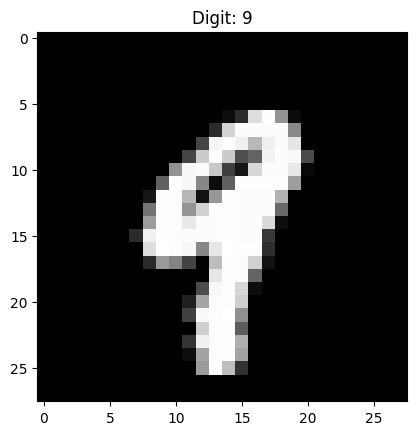

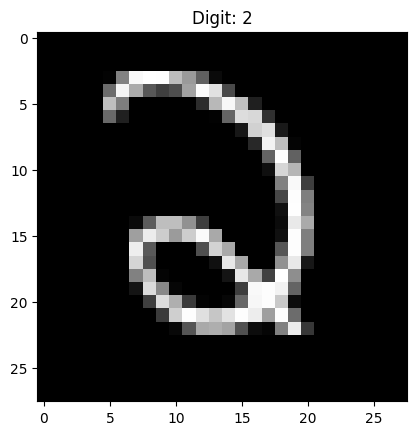

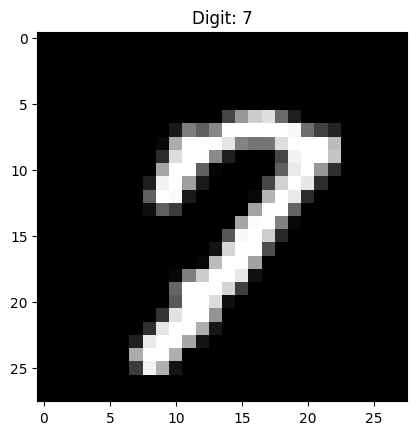

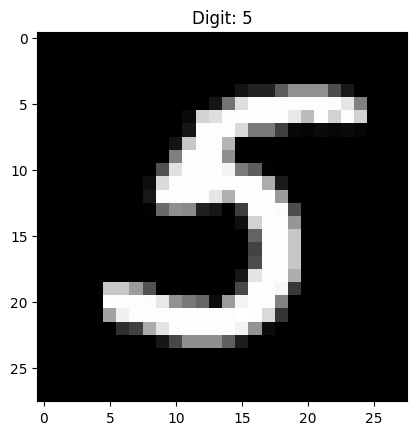

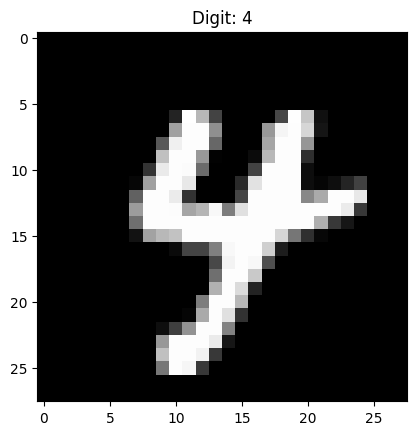

In [ ]:
# your code goes here
# Initialize a dictionary to keep track of whether I've found an example for each digit
found_examples = {0: False, 1: False, 2: False, 3: False, 4: False, 5: False, 6: False, 7: False, 8: False, 9: False}

#iterate over the data and target tensors
for (data, target) in train_loader:
  #put on GPU
  data = data.to(device)
  target = target.to(device)

   # Loop through the batch
  for i in range(data.shape[0]):
    image = data[i].view(28, 28).detach().cpu().numpy()
    label = target[i].item()

    # Check if you've found an example for this digit
    if not found_examples[label]:
    # Plot the image using plt.imshow with cmap='gray'
      plt.imshow(image, cmap='gray')
      plt.title(f'Digit: {label}')
      plt.show()

      # Mark that you've found an example for this digit
      found_examples[label] = True

      # Check if you've found examples for all digits
      if all(found_examples.values()):
        break  # If you've found examples for all digits, you can exit the loop



## PyTorch Primitives

### Exercise 2

- Using only torch primitives (e.g. [torch.matmul](https://pytorch.org/docs/stable/generated/torch.matmul.html), [torch._relu](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html), etc) implement a _simple feedforward neural network_ with 2 _hidden layers_ that takes as input MNIST digits (28x28) and outputs **a single scalar value**.
    - You may select the _hidden layer width_ (greater than 20) and activations (`tanh`, `relu`, `sigmoid`, others) as desired.  Initialize the weights  with [uniform random values](https://pytorch.org/docs/stable/generated/torch.rand.html) in the range -1 to 1 and [biases at 0](https://pytorch.org/docs/stable/generated/torch.zeros.html).
    - Avoid using any functions from `torch.nn` class. Using the loop from Exercise 1, _forward pass_ through the dataset in _mini-batches of 256_.
- Perform a forward pass using `my_nn` function

In [ ]:
import torch

# Initialize and track the parameters using a list or dictionary
h1_size = 25
h2_size = 25
param_dict = {
    "W0": 2 * torch.rand((10, 28*28*1)) - 1, #28*28 since image pixels are flattened
    "b0": torch.zeros(10), #10 classes
    #each output of h1 will be a vector of shape (10,)
    "W1": 2 * torch.rand((10, 10)) - 1,
    "b1": torch.zeros(10),

    "W2": 2 * torch.rand((10, 10)) - 1,
    "b2": torch.zeros(10),
    }

for name, param in param_dict.items():
  param_dict[name] = param.to(device)
  param.requires_grad=True

# Define the network
def my_nn(input, param_dict):
    r"""Performs a single forward pass of a Neural Network with the given
    parameters in param_dict.

    Args:
        input (torch.tensor): Batch of images of shape (B, H, W), where B is
            the number of input samples,and H and W are the image height and
            width respectively.
        param_dict (dict of torch.tensor): Dictionary containing the parameters
            of the neural network. Expects dictionary keys to be of format
            "W#" and "b#" where # is the layer number.

    Returns:
        torch.tensor: Neural network output of shape (B, )
    """

    # input


    # layer 1


    # layer 2


    # output


    return


# Perform forward pass


## PyTorch Neural Modules

### Exercise 3

- Implement a new `torch.nn.module` that performs the equivalent of the network in Exercise 2 and call it `"model"`.
- Initialize it with the same weights
    - for instance: `nn.Linear(in_features, out_features).weight.data = insert your desired weights`;
    - you could do a similar thing (as above) with the bias.
- Validate that the outputs of this network are the same as the one in Exercise 2 on the MNIST training set.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, h1_siz, h2_siz):
        super(Model, self).__init__()
        self.linear1 =
        self.linear2 =
        self.linear3 =

    def forward(self, x):

        return

# Make an instance of Model here


- Validating the implementations match.
    - First you will need to make sure the `param_dict` from Exercise 2 and the nn module version have the same parameters.
    - You can do this for example using:
`model.linear1.weight.data = copy.deepcopy(param_dict['W0'].data.T)`

**Hint:** To make sure that the outputs are roughly equal find the mean of the squared difference between the output of the PyTorch modedl and the output of your nn function squared. This value should be less than 1e-4.

In [ ]:
import copy

# We can access all the variables in model and manipulate them directly

# Note here we do a deepcopy just to make sure this model is separate from the one in the above cell

for i,(data, _) in enumerate(train_loader):
  data = data.to(device)
  # check that all the outputs are roughly equal
print("All Clear !")

In [ ]:
# For completeness this cell is helpful if you are reruning the answers and thus need to clear the previous gradient
# There is a need to clear the gradient buffers before computing the backward pass
model.zero_grad() # for nn module

for (_,param) in param_dict.items():
  if param.grad is not None: # grad buffer doesnt exist until the first backward pass
    param.grad.detach_() # by default the gradient is in the computation graph
    param.grad.zero_()

### Exercise 4

In this exercise, we will take a closer look at how neural networks perform without training and why training is essential for their success.

1- Use your untrained "model" network that contains random initial weights and biases.

2- Input a single data point (MNIST image) into the model and observe the prediction it generates. Compare this prediction with the label of the image.

Summarize your observations

## Learning about computational graphs

In this exercise, you will use your pytorch model to visualize its computational graph. You'll gain insights into how neural networks compute and propagate gradients.

First run the cell below to import torchviz for visualization of the computational graph.


In [ ]:
pip install torchviz

Computational Graph Legend:

- **Blue Boxes:** Leaf nodes, often representing tensors or variables, including input data, weights, and biases.

- **Grey Boxes:** Intermediate operations in the graph, such as activations, backward pass operations, or other computations during forward and backward passes.

In [ ]:
import torchviz
# Input data into your PyTorch model and store the output in a variable
output =

# Create the computational graph with custom node names
graph = torchviz.make_dot(output, params=dict(model.named_parameters()))

# Display the graph with variable names
display(graph)

### Exercise 4

Using the generate computational graph, identify and label the following components:

- Input data.
- Weight and bias tensors.
- Activation functions (ReLU).
- Linear transformations (matrix multiplications).

Describe the flow of data from input to output.
Explain how gradients are computed during the backward pass for weight updates.

Your answer:

## Training Models in PyTorch

### Exercise 5

- For a single mini-batch of 256 samples (you can select any mini-batch), compute the gradient of the average of the neural network outputs (over the batch) w.r.t. to the weights using `torch.autograd`.
- Print the gradients for the first layer weights and biases.
    - You can use either the model defined from Exercises 2 or 3 for this.  

**Note**: The network here is
$$
f: \mathcal{R}^{HW}\rightarrow\mathcal{R},
$$
with $256$ samples. You should obtain

$$
o=\frac{1}{256}\sum_{i=0}^{255}f(x_i)
$$


### Exercise 6

> Below you will find code for comparing the speed of a model on CPU and GPU as well as comparing the speed of a forward pass to a forward/backward pass.

- Instantiate a version of your model from Exercise 3 (preferably a larger version e.g. width 100 or 500) and run the timing code.
- Write 1-2 sentences to summarize your observations about the relative speed's of CPU/GPU and forward/backward.

In [ ]:
#Instantiate a model defined from (3) here
model =

In [ ]:
#Run on CPU
import time as timer
data = data.to('cpu')
model.cpu()

print('Running on CPU')

start = timer.time()
for _ in range(10):
    model(data)
print("Time taken forward", timer.time() - start)

start = timer.time()
for _ in range(10):
    out = model(data).mean()
    out.backward()
print("Time taken forward/backward", timer.time() - start)

In [ ]:
#Run on GPU
#initialize cuda
data = data.to('cuda')
model.cuda()
model(data)
print('Running on GPU')


start = timer.time()
for _ in range(10):
    model(data)
torch.cuda.synchronize()
print("Time taken", timer.time() - start)

start = timer.time()
for _ in range(10):
    out = model(data).mean()
    out.backward()
torch.cuda.synchronize()
print("Time taken forward/backward", timer.time() - start)

Summary of observations here: